# (06) DOVES—PoisConv—1

**Motivation**: Categorical + DOVES + Conv encoder. ```prior_fit = True```. Device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

model_type = 'categorical'

## Archi: ```<Conv|Lin>```

In [3]:
cfg_vae, cfg_tr = default_configs('DOVES', model_type, 'conv+b|lin')
cfg_vae['fit_prior'] = True
cfg_vae['n_categories'] = 512
cfg_vae['n_latents'] = 1

print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'DOVES', 'n_ch': 32, 'n_latents': 1, 'n_categories': 512, 'enc_type': 'conv', 'dec_type': 'lin', 
'enc_bias': True, 'dec_bias': False, 'fit_prior': True}

Trainer:
{'temp_anneal_portion': 1.0, 'temp_anneal_type': 'exp', 'temp_start': 1.0, 'temp_stop': 0.1, 'lr': 0.005, 
'batch_size': 1000, 'epochs': 3000, 'optimizer_kws': {'weight_decay': 0.0}, 'grad_clip': 500}

+----------------+------------+
|  Module Name   | Num Params |
+----------------+------------+
| CategoricalVAE |  1.4 Mil   |
|      ---       |    ---     |
|      stem      |    352     |
|      enc       |  1.2 Mil   |
|     fc_enc     |   66.0 K   |
|     fc_dec     |  131.1 K   |
+----------------+------------+

categorical_c-512_prior-fit_DOVES_z-1_k-32_<conv+b|lin>
mc_b1000-ep3000-lr(0.005)_beta(1:0x0.5)_temp(0.1:exp-1)_gr(500)_(2024_05_06,08:18)

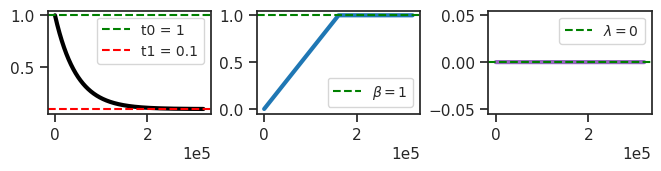

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [5]:
print(vae)

CategoricalVAE(
  (mse): MSELoss()
  (stem): Conv2D(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc): Sequential(
    (0): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (1): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(32, 16, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (3): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(64, 32, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (4): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): ResConvPool(
      (act_fn): SiLU()
      (pool): AdaptiveAvgPool2d(output_size=(1, 1))
      (conv): Conv2D(128, 128, kernel_size=(4, 4), stride=(1, 1), padding=valid)
    )
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): ResDenseLayer(
      (fc1): Linear(in_features=128, out_features=1024, bias=True)
      (fc2): Linear(in_features=1024, out_features=128, bias=True)
      (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (drop): Dropout(p=0.1, inplace=False)
      (relu): ReLU()
    )
  )
  (fc_enc): Linear(in_features=128, out_features=512, bias=True)
  (fc_dec): Linear(in_features=512, out_features=256, bias=False)
)

In [6]:
vae.fc_dec.bias, vae.fc_enc.bias.shape

(None, torch.Size([512]))

In [7]:
vars(tr.cfg)

{'lr': 0.005,
 'epochs': 3000,
 'batch_size': 1000,
 'warm_restart': 0,
 'warmup_epochs': 5,
 'optimizer': 'adamax_fast',
 'optimizer_kws': {'weight_decay': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-08},
 'scheduler_type': 'cosine',
 'scheduler_kws': {'T_max': 2995.0, 'eta_min': 1e-05},
 'ema_rate': 0.999,
 'grad_clip': 500,
 'chkpt_freq': 50,
 'eval_freq': 20,
 'log_freq': 10,
 'use_amp': False,
 'method': 'mc',
 'kl_beta': 1.0,
 'kl_beta_min': 0.0001,
 'kl_anneal_cycles': 0,
 'kl_anneal_portion': 0.5,
 'kl_const_portion': 0.0001,
 'lambda_anneal': False,
 'lambda_init': 0.0,
 'lambda_norm': 0.0,
 'temp_anneal_portion': 1.0,
 'temp_anneal_type': 'exp',
 'temp_start': 1.0,
 'temp_stop': 0.1}

In [8]:
vars(vae.cfg)

{'n_categories': 512,
 'fit_prior': True,
 'type': 'categorical',
 'enc_type': 'conv',
 'dec_type': 'lin',
 'enc_bias': True,
 'dec_bias': False,
 'dataset': 'DOVES',
 'input_sz': 16,
 'n_ch': 32,
 'n_latents': 1,
 'weight_norm': False,
 'use_bn': False,
 'use_se': True,
 'res_eps': 1.0,
 'activation_fn': 'swish',
 'init_scale': 0.5,
 'seed': 0,
 'base_dir': '/home/hadi/Projects/PoissonVAE',
 'results_dir': '/home/hadi/Projects/PoissonVAE/results',
 'runs_dir': '/home/hadi/Projects/PoissonVAE/runs/categorical_c-512_prior-fit_DOVES_z-1_k-32_<conv+b|lin>',
 'save_dir': '/home/hadi/Projects/PoissonVAE/models/categorical_c-512_prior-fit_DOVES_z-1_k-32_<conv+b|lin>',
 'data_dir': '/home/hadi/Datasets'}

### Train

In [9]:
# comment = f"..._{tr.cfg.name()}"
comment = tr.cfg.name()
tr.train(comment=comment)

epoch # 3000, avg loss: 173.161373: 100%|█████████████████████| 3000/3000 [2:40:11<00:00,  3.20s/it]


### Loss vld (freeze)

In [10]:
data, loss, etc = tr.validate()

_loss = {k: v.mean() for k, v in loss.items()}
_loss['tot'] = _loss['mse'] + _loss['kl']
print(_loss)

{'mse': 165.39445, 'kl': 5.4255557, 'kl_diag': 5.414346, 'tot': 170.82}

In [26]:
### Was: fixed prior

{'mse': 165.01498, 'kl': 5.632016, 'kl_diag': 5.6216135, 'tot': 170.647}

{'mse': 134.10709, 'kl': 28.86082, 'kl_diag': 0.056184433, 'tot': 162.96791}

{'mse': 133.72597, 'kl': 28.916742, 'kl_diag': 0.05594784, 'tot': 162.64272}

{'mse': 132.80032, 'kl': 29.794188, 'kl_diag': 0.05768895, 'tot': 162.59451}

### Plot enc/dec weights

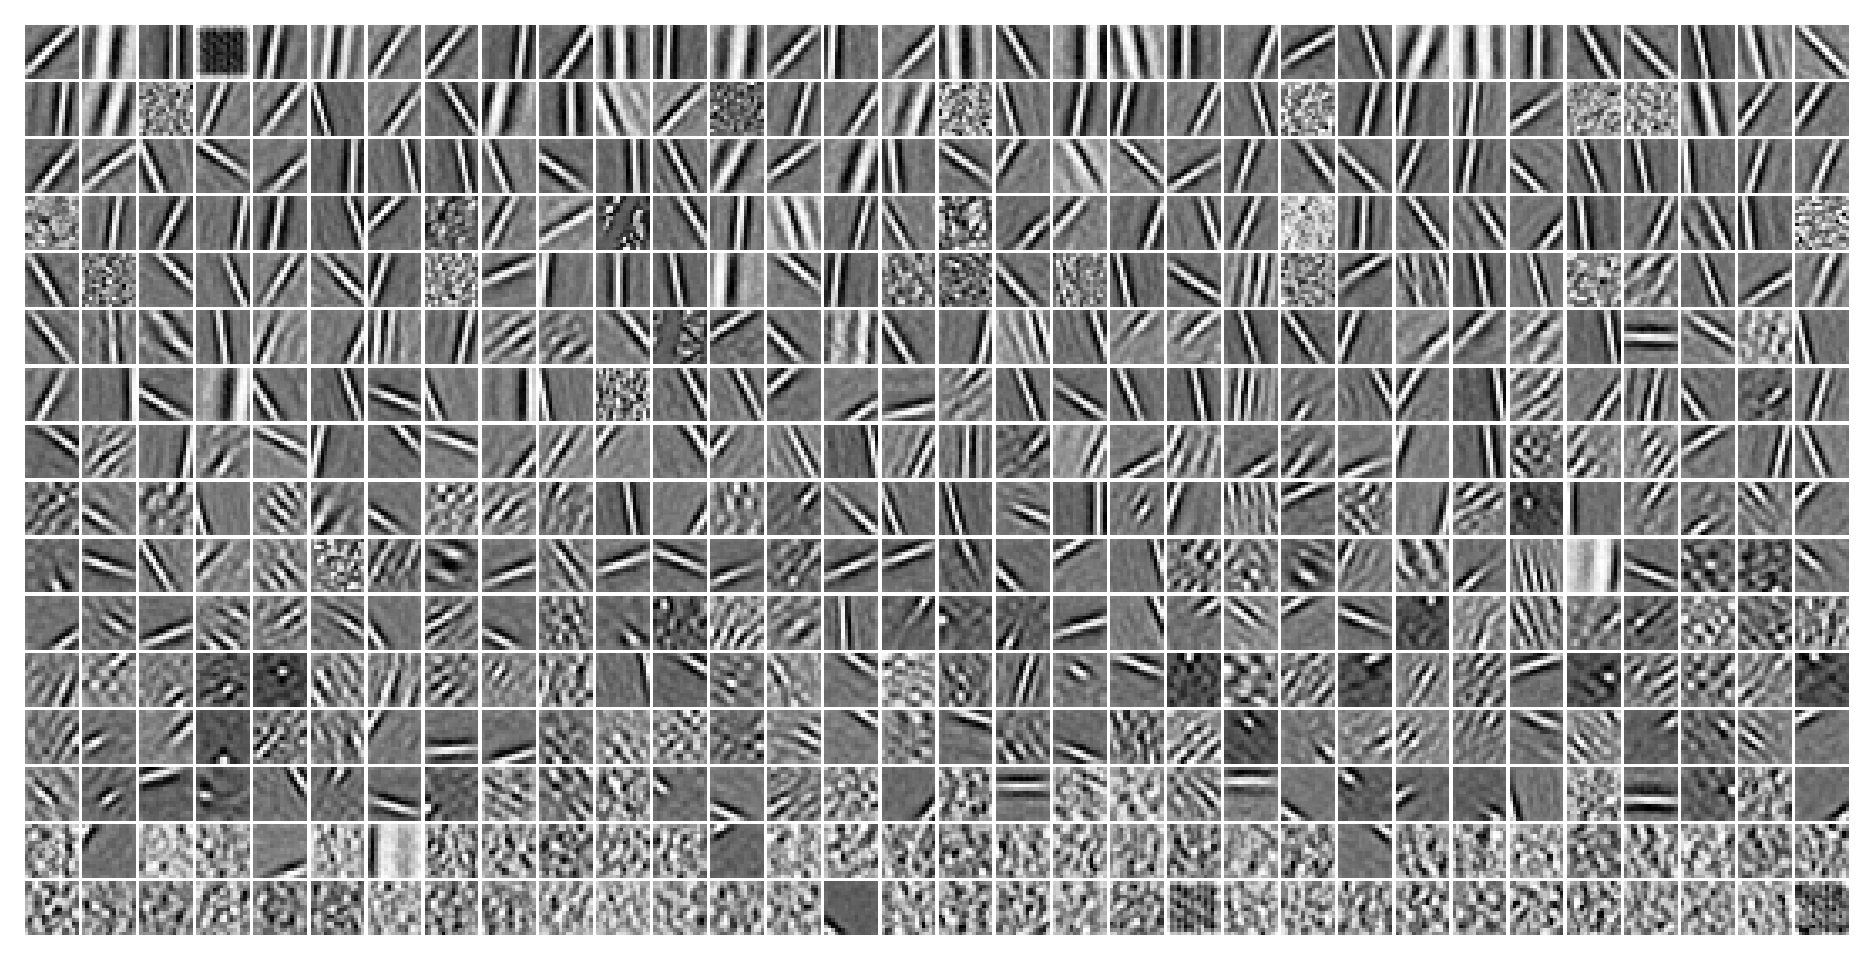

In [11]:
vae.show(dpi=250, order=np.argsort(flatten_np(etc['logits'], start_dim=1).mean(0)));

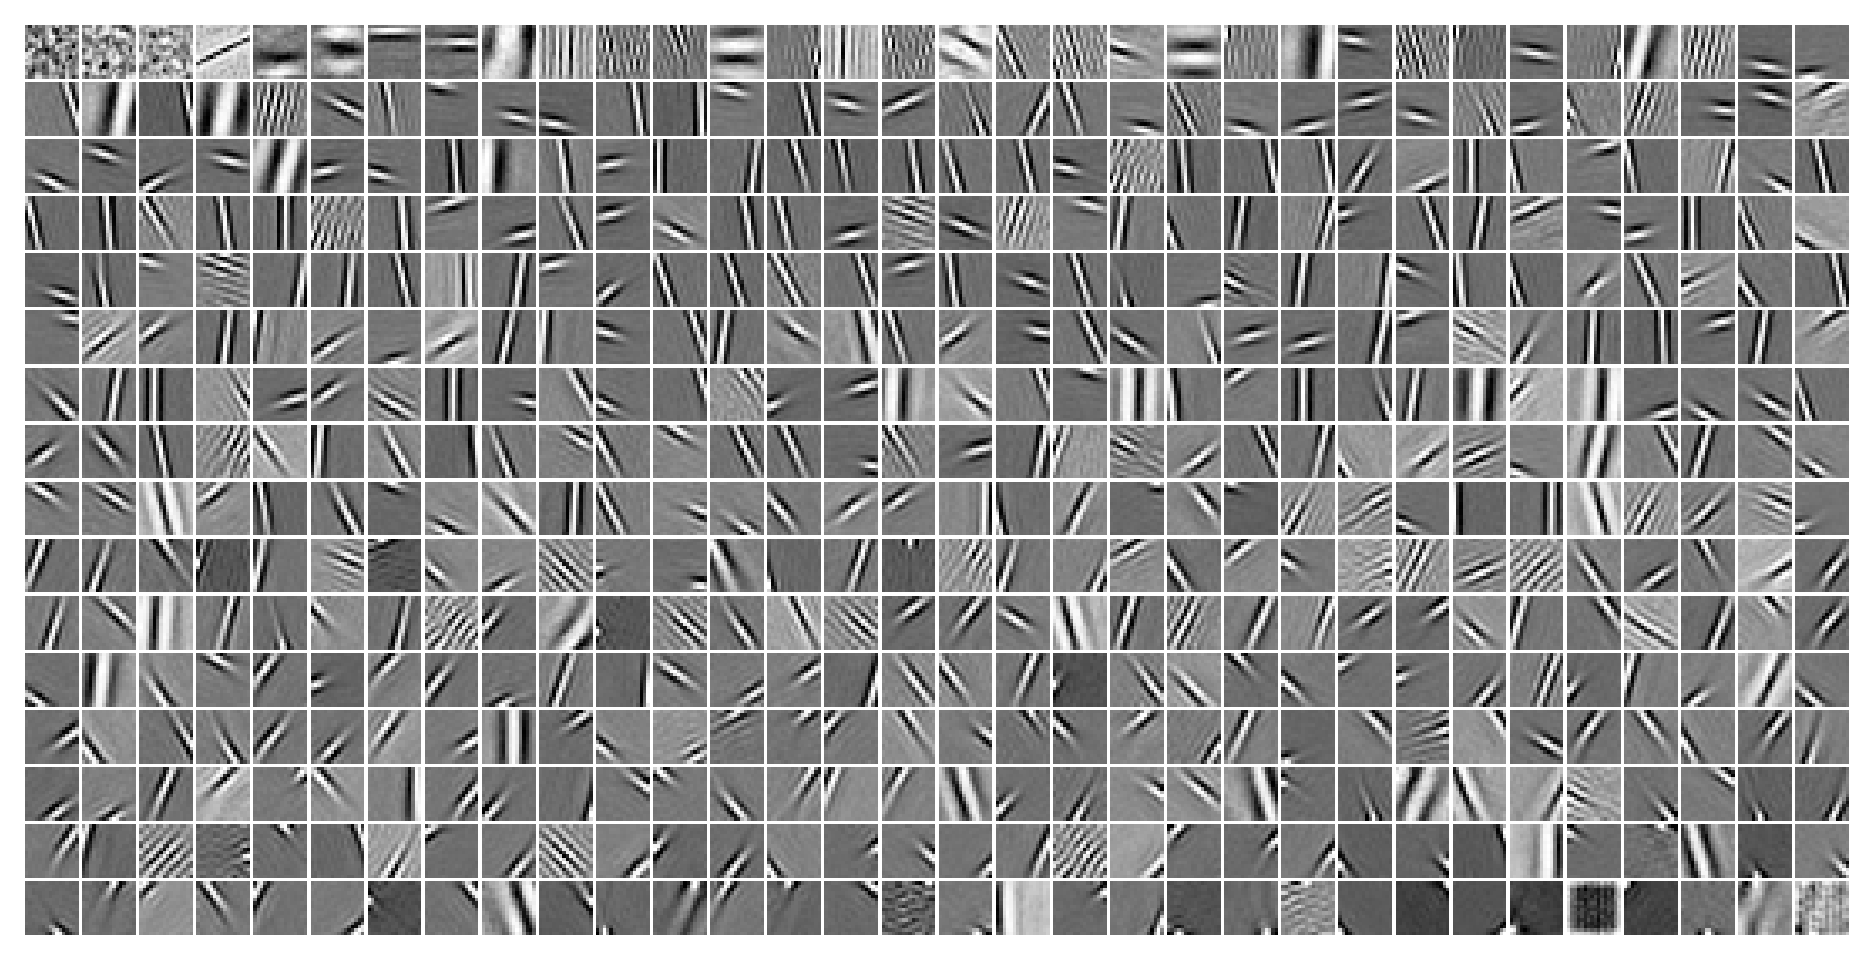

### Some more distributions

In [12]:
tr.model.temp, tr.cfg.kl_beta

(tensor(0.1009, device='cuda:1'), 1.0)

In [33]:
from figures.imgs import plot_weights

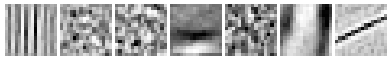

In [36]:
try:
    ind = np.where(loss['kl_diag'] < dead_thres)[0]
    plot_weights(vae.fc_dec.weight.data.T.reshape(-1, 16, 16)[ind], nrows=1, dpi=50);
except ValueError:
    pass

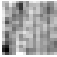

In [37]:
try:
    ind = np.where(tonp(vae.log_rate.squeeze()) > 1)[0]
    plot_weights(vae.fc_dec.weight.data.T.reshape(-1, 16, 16)[ind], nrows=1, dpi=15);
except ValueError:
    pass

## Loggabor analysis

In [13]:
dead = np.zeros(np.prod(tr.model.size)).astype(bool)

In [14]:
from analysis.loggabor import fit_loggabor
from figures.theta import plot_theta
from figures.imgs import plot_weights

In [15]:
results = fit_loggabor(tr, verbose=True)

  5%|▌           | 24/512 [00:01<00:22, 22.03it/s]

 23%|██▍        | 116/512 [00:04<00:17, 23.10it/s]

 36%|███▉       | 185/512 [00:07<00:10, 31.01it/s]

 43%|████▊      | 222/512 [00:09<00:12, 23.12it/s]

 45%|████▉      | 229/512 [00:09<00:12, 22.65it/s]

 78%|████████▌  | 398/512 [00:16<00:03, 31.59it/s]

 83%|█████████▏ | 425/512 [00:17<00:04, 18.84it/s]

 87%|█████████▌ | 444/512 [00:19<00:05, 12.61it/s]

 88%|█████████▋ | 450/512 [00:19<00:03, 15.75it/s]

 90%|█████████▊ | 459/512 [00:20<00:03, 17.50it/s]

 93%|██████████▎| 478/512 [00:21<00:01, 18.91it/s]

 98%|██████████▊| 501/512 [00:22<00:00, 20.12it/s]

100%|███████████| 512/512 [00:22<00:00, 22.53it/s]


In [16]:
results.loc[results['sf_0'] > 10, 'sf_0'] = np.nan
results.iloc[np.logical_or(dead, np.isnan(results['theta']))] = np.nan
results.describe()

,x_pos,y_pos,theta,sf_0,phase,B_sf,B_theta,theta_deg,probs
count,4.940000e+02,4.940000e+02,494.000000,493.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,7.358886e+00,7.603145e+00,0.132485,0.218721,-0.164862,0.439199,0.220939,87.388423,0.001945
std,3.121668e+00,3.533492e+00,1.042149,0.158728,1.522552,1.371618,0.377476,39.400760,0.000170
min,1.123620e-07,1.642011e-10,-1.570796,0.095585,-11.161807,0.066675,0.054703,0.195969,0.001749
25%,5.529404e+00,4.954548e+00,-0.915629,0.193644,-0.713675,0.278297,0.119898,54.627171,0.001870
50%,7.436343e+00,7.552580e+00,0.546980,0.214244,-0.156377,0.377873,0.150545,84.137199,0.001880
75%,8.934146e+00,1.049901e+01,1.039389,0.233965,0.466698,0.437411,0.214212,118.879777,0.001895
max,1.600000e+01,1.560988e+01,1.570796,3.636789,5.699162,30.550393,6.780328,176.724603,0.002446


In [17]:
rates_axial = results.loc[(results['label'] == 'axial') & ~dead, 'probs'].values
rates_oblique = results.loc[(results['label'] == 'oblique') & ~dead, 'probs'].values

print(f"{sp_stats.mannwhitneyu(rates_axial, rates_oblique, method='auto')}")

MannwhitneyuResult(statistic=24076.0, pvalue=0.0006978209372316104)

In [18]:
a, b = len(rates_axial), len(rates_oblique)
a / (a+b), b / (a+b)

(0.402834008097166, 0.597165991902834)

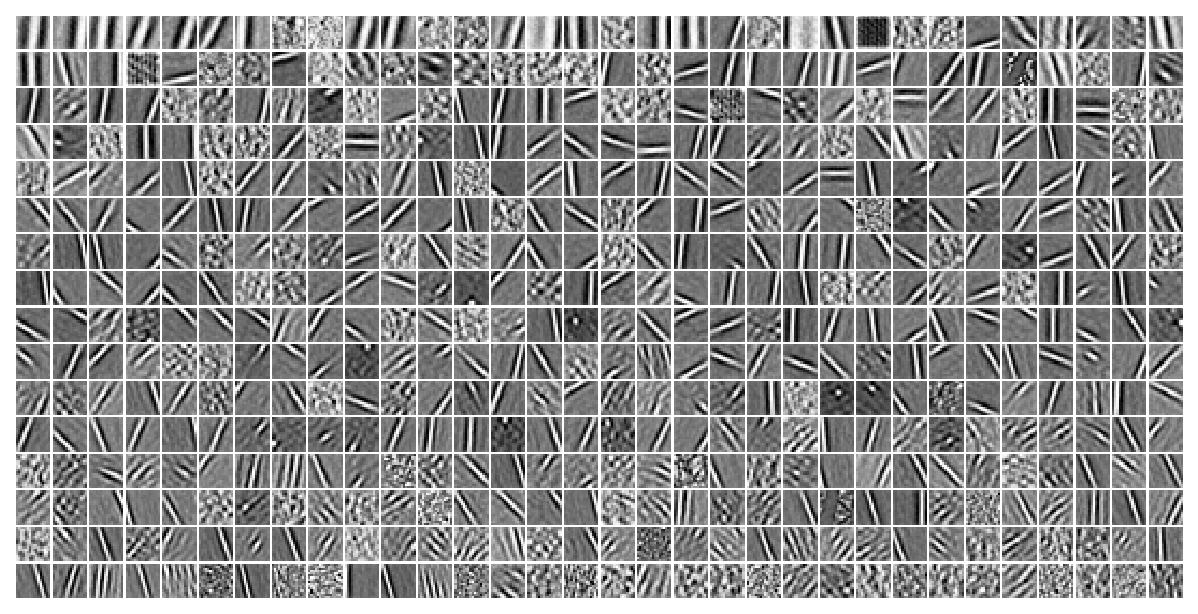

In [19]:
order = np.argsort(results['sf_0'].values)
_ = tr.model.show(order=order)

In [20]:
w_dec = tonp(tr.model.fc_dec.weight.data)
w_dec = w_dec.T.reshape(-1, 16, 16)
ids = np.argsort(results['sf_0'].values)

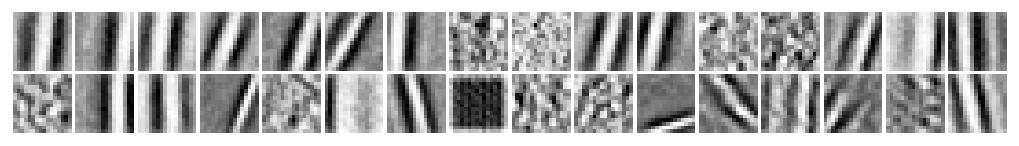

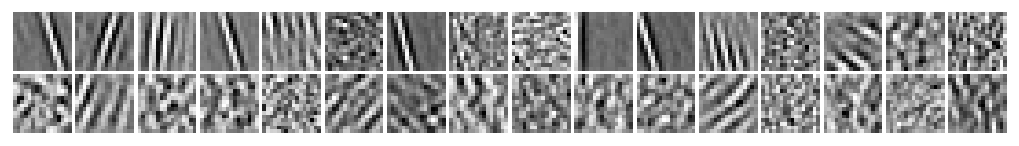

In [21]:
plot_weights(w_dec[ids[:32]], nrows=2, dpi=130)
plt.show()

plot_weights(w_dec[ids[-32:]], nrows=2, dpi=130)
plt.show()